Install yahoo finance to pull in data

---



In [ ]:
! pip install yfinance

Import all functions

---



In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bring in bitcoin and S&P 500 data

---



In [ ]:
btc = yf.Ticker("BTC-USD")
SP500 = yf.Ticker("SPY")

In [ ]:
df_btc = pd.DataFrame(data = btc.history(start="2014-09-17"))
df_SP500 = pd.DataFrame(data = SP500.history(start="2014-09-17"))

Remove dividends and stock splits columns

---



In [ ]:
df_btc = df_btc.drop(columns = ["Dividends", "Stock Splits"])
df_SP500 = df_SP500.drop(columns = ["Dividends", "Stock Splits"])

Calcualte volatitlity and compare to S&P 500

---



In [ ]:
df_btc['log_ret'] = np.log(df_btc['Close']/df_btc['Close'].shift(1))
df_btc['Volatility'] = df_btc['log_ret'].rolling(window = 10).std() * np.sqrt(10)
df_SP500['log_ret'] = np.log(df_SP500['Close']/df_SP500['Close'].shift(1))
df_SP500['Volatility'] = df_SP500['log_ret'].rolling(window = 10).std() * np.sqrt(10)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ed72c6f28>,
      dtype=object)

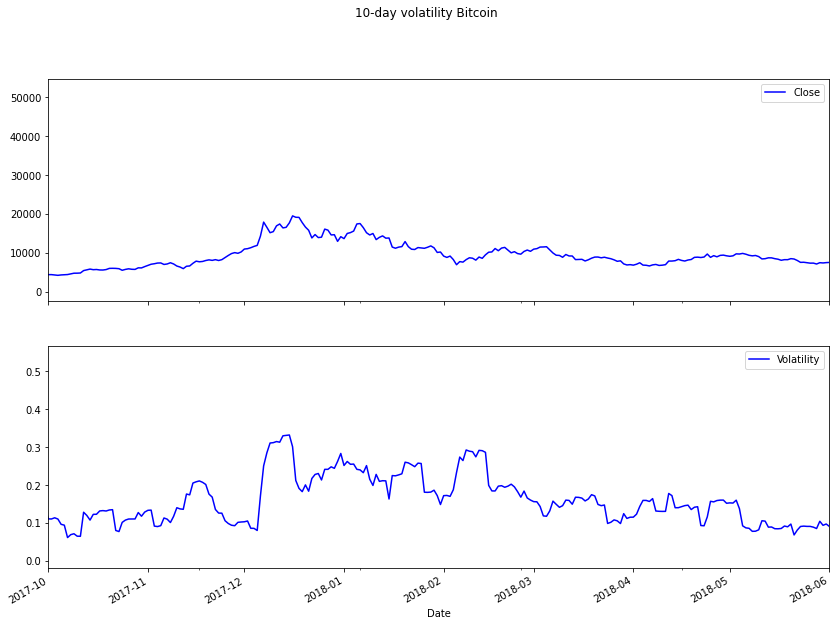

In [ ]:
df_btc[['Close', 'Volatility']].plot(
    title = "10-day volatility Bitcoin", 
    subplots=True, 
    color='blue',
    figsize=(14, 10),
    xlim=(pd.Timestamp('2017-10-01'), pd.Timestamp('2018-06-01'))
    )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ed71d92e8>,
      dtype=object)

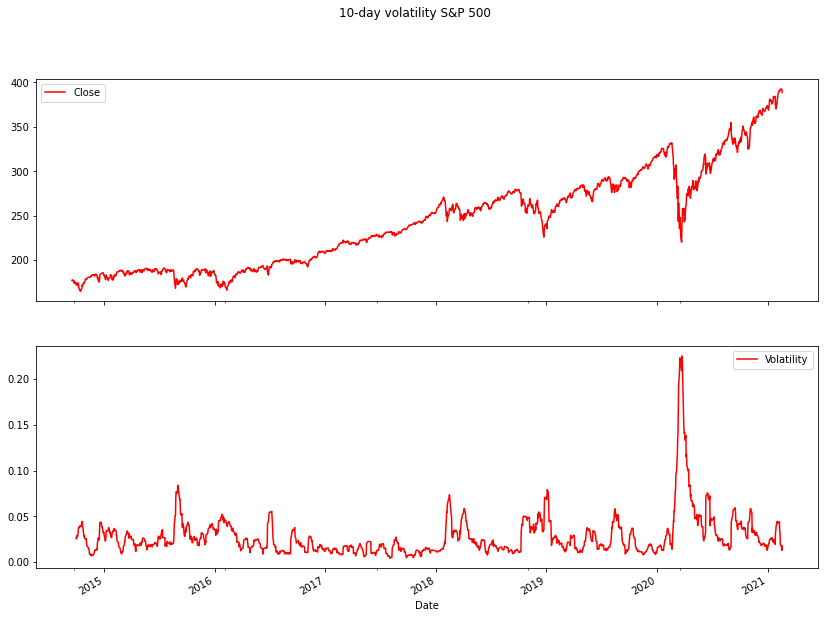

In [ ]:
df_SP500[['Close', 'Volatility']].plot(
    title = "10-day volatility S&P 500", 
    subplots=True, 
    color='red',
    figsize=(14, 10),
    
    )